<a href="https://colab.research.google.com/github/amoniaka-knabino/sirius_climate_2024/blob/main/results_linreg_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

column_name = ['year', 'mon', 'day', 'hour', 'lat', 'lon', 'hsun', 'slp', 'ta', 'sst', 'td', 'rh', 'icn', 'icl', 'low', 'mid', 'high', 'iww', 'ws', 'wd']
numbers = range(1, 13)
years_first_decade = range(1950, 1961)
years_second_decade = range(1961, 1963)

In [ ]:
df_first_decade = pd.DataFrame()
df_second_decade = pd.DataFrame()

In [ ]:
for year in years_first_decade:
  for n in [str(num).zfill(2) for num in numbers]:
    df_next_file = pd.read_fwf(f"{year}_{n}_data.fwf", names=column_name)
    df_next_file = df_next_file[
            (df_next_file["lat"] > 20) &
            (df_next_file["lat"] < 60) &
            (df_next_file["lon"] <-10) &
            (df_next_file["lon"] >-50)]
    df_first_decade = pd.concat([df_first_decade, df_next_file], axis=0)

In [ ]:
df_first_decade

,year,mon,day,hour,lat,lon,hsun,slp,ta,sst,td,rh,icn,icl,low,mid,high,iww,ws,wd
3,1950,1,1,0,59.9,-19.9,-49.36,994.7,7.8,9.4,1.6,0.648,2,-9,-9,-9,-9,-99,17.8,214.0
4,1950,1,1,0,58.7,-16.0,-51.39,1005.2,8.9,9.4,6.7,0.861,7,5,5,7,0,0,15.4,210.0
5,1950,1,1,0,58.2,-21.0,-50.48,1000.6,7.8,7.8,5.6,0.860,4,4,8,0,0,0,15.4,225.0
6,1950,1,1,0,55.0,-13.4,-55.34,1019.0,11.1,10.0,11.1,1.000,8,8,5,-9,-9,0,15.4,203.0
8,1950,1,1,0,54.4,-15.6,-55.29,1014.8,11.1,11.1,10.1,0.936,7,7,5,0,0,8,-9.9,-9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109301,1960,12,1,0,47.2,-32.8,-25.87,1016.3,14.2,12.0,10.3,0.774,8,-9,-9,-9,-9,-99,19.0,230.0
109305,1960,12,1,0,44.8,-15.8,-37.63,1025.0,10.0,11.1,6.7,0.799,5,5,9,0,0,2,13.4,295.0
109307,1960,12,1,0,44.0,-41.0,-19.61,1016.4,16.7,16.1,15.0,0.897,8,8,5,10,10,60,15.9,180.0
109321,1960,12,1,0,35.0,-48.0,-11.73,1017.2,20.0,21.1,18.3,0.900,8,5,7,2,10,21,2.1,205.0


In [ ]:
for year in years_second_decade:
  for n in [str(num).zfill(2) for num in numbers]:
    df_next_file = pd.read_fwf(f"{year}_{n}_data.fwf", names=column_name)
    df_next_file = df_next_file[
        (df_next_file["lat"] > 20) &
        (df_next_file["lat"] < 60) &
        (df_next_file["lon"] <-10) &
        (df_next_file["lon"] >-50)]
    df_second_decade = pd.concat([df_second_decade, df_next_file], axis=0)

In [ ]:
df_second_decade

,year,mon,day,hour,lat,lon,hsun,slp,ta,sst,td,rh,icn,icl,low,mid,high,iww,ws,wd
2,1961,1,1,0,58.7,-17.8,-50.94,988.5,7.9,9.7,4.7,0.802,2,2,2,0,0,1,11.8,280.0
11,1961,1,1,0,55.7,-30.7,-48.80,989.9,6.7,9.4,3.9,0.823,8,8,7,-9,-9,25,15.4,250.0
24,1961,1,1,0,53.4,-15.9,-56.07,1002.0,7.8,10.7,6.3,0.902,8,3,2,1,-9,15,14.4,270.0
25,1961,1,1,0,53.2,-17.3,-55.80,1004.4,7.2,-99.9,4.4,0.824,7,3,7,2,0,2,15.4,290.0
27,1961,1,1,0,53.0,-36.0,-47.91,1003.6,5.6,6.1,0.0,0.672,8,8,-9,-9,-9,-99,13.4,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109180,1962,12,1,0,44.7,-15.9,-37.56,1006.2,9.4,12.8,2.3,0.612,2,2,2,0,0,2,6.2,295.0
109181,1962,12,1,0,44.0,-41.0,-19.61,1010.7,13.9,14.4,8.9,0.718,1,1,1,0,0,2,4.6,115.0
109191,1962,12,1,0,38.4,-11.2,-41.34,1011.2,13.6,15.2,11.7,0.883,8,6,3,2,-9,60,5.1,250.0
109194,1962,12,1,0,35.0,-48.0,-11.73,998.2,20.0,20.0,16.7,0.813,8,8,8,10,10,80,10.3,225.0


**Начинаем чистку!**

In [ ]:
names_for_drop = ['icn', 'icl', 'low', 'mid', 'high', 'iww', 'ws', 'wd']
values_for_drop = [-9, -9, -9, -9, -9, -99, -9.9, -9.9]

df_first_decade_replaced = df_first_decade
df_second_decade_replaced = df_second_decade

for key, value in zip(names_for_drop, values_for_drop):
  df_first_decade_replaced[key] = df_first_decade_replaced[key].replace(value, np.nan)

for key, value in zip(names_for_drop, values_for_drop):
  df_second_decade_replaced[key] = df_second_decade_replaced[key].replace(value, np.nan)

In [ ]:
from copy import copy

def get_day_number(month, day):
    return 31*(month-1)+day

def code_cyclic_values(df, cyclic_columns):
    new_df = copy(df)
    new_df.drop(cyclic_columns, axis=1, inplace=True)
    for c in cyclic_columns:
        max_v = df[c].max()
        new_df[f'{c}_sin'] = np.sin(2 * np.pi * df[c]/max_v)
        new_df[f'{c}_cos'] = np.cos(2 * np.pi * df[c]/max_v)
    return new_df

filtered_encoded_train = copy(df_first_decade_replaced)

filtered_encoded_train["day_number"] = get_day_number(filtered_encoded_train["mon"], filtered_encoded_train["day"])
filtered_encoded_train.drop(["day", "mon"], axis=1, inplace=True)

filtered_encoded_train = code_cyclic_values(filtered_encoded_train, ["lon", "day_number", "hour"])
filtered_encoded_train

,year,lat,hsun,slp,ta,sst,td,rh,icn,icl,...,high,iww,ws,wd,lon_sin,lon_cos,day_number_sin,day_number_cos,hour_sin,hour_cos
3,1950,59.9,-49.36,994.7,7.8,9.4,1.6,0.648,2.0,NaN,...,NaN,NaN,17.8,214.0,-0.100063,0.994981,0.017951,0.999839,0.0,1.0
4,1950,58.7,-51.39,1005.2,8.9,9.4,6.7,0.861,7.0,5.0,...,0.0,0.0,15.4,210.0,-0.563197,-0.826323,0.017951,0.999839,0.0,1.0
5,1950,58.2,-50.48,1000.6,7.8,7.8,5.6,0.860,4.0,4.0,...,0.0,0.0,15.4,225.0,0.555407,0.831578,0.017951,0.999839,0.0,1.0
6,1950,55.0,-55.34,1019.0,11.1,10.0,11.1,1.000,8.0,8.0,...,NaN,0.0,15.4,203.0,0.857552,-0.514397,0.017951,0.999839,0.0,1.0
8,1950,54.4,-55.29,1014.8,11.1,11.1,10.1,0.936,7.0,7.0,...,0.0,8.0,NaN,NaN,-0.340712,-0.940168,0.017951,0.999839,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109301,1960,47.2,-25.87,1016.3,14.2,12.0,10.3,0.774,8.0,NaN,...,NaN,NaN,19.0,230.0,0.991965,-0.126514,-0.143122,0.989705,0.0,1.0
109305,1960,44.8,-37.63,1025.0,10.0,11.1,6.7,0.799,5.0,5.0,...,0.0,2.0,13.4,295.0,-0.455525,-0.890223,-0.143122,0.989705,0.0,1.0
109307,1960,44.0,-19.61,1016.4,16.7,16.1,15.0,0.897,8.0,8.0,...,10.0,60.0,15.9,180.0,0.523767,0.851862,-0.143122,0.989705,0.0,1.0
109321,1960,35.0,-11.73,1017.2,20.0,21.1,18.3,0.900,8.0,5.0,...,10.0,21.0,2.1,205.0,-0.975027,0.222085,-0.143122,0.989705,0.0,1.0


In [ ]:
filtered_encoded_test = copy(df_second_decade_replaced)

filtered_encoded_test["day_number"] = get_day_number(filtered_encoded_test["mon"], filtered_encoded_test["day"])
filtered_encoded_test.drop(["day", "mon"], axis=1, inplace=True)

filtered_encoded_test = code_cyclic_values(filtered_encoded_test, ["lon", "day_number", "hour"])
filtered_encoded_test

,year,lat,hsun,slp,ta,sst,td,rh,icn,icl,...,high,iww,ws,wd,lon_sin,lon_cos,day_number_sin,day_number_cos,hour_sin,hour_cos
2,1961,58.7,-50.94,988.5,7.9,9.7,4.7,0.802,2.0,2.0,...,0.0,1.0,11.8,280.0,-0.996978,0.077684,0.017951,0.999839,0.0,1.0
11,1961,55.7,-48.80,989.9,6.7,9.4,3.9,0.823,8.0,8.0,...,NaN,25.0,15.4,250.0,0.246279,0.969199,0.017951,0.999839,0.0,1.0
24,1961,53.4,-56.07,1002.0,7.8,10.7,6.3,0.902,8.0,3.0,...,NaN,15.0,14.4,270.0,-0.449828,-0.893115,0.017951,0.999839,0.0,1.0
25,1961,53.2,-55.80,1004.4,7.2,-99.9,4.4,0.824,7.0,3.0,...,0.0,2.0,15.4,290.0,-0.972912,-0.231176,0.017951,0.999839,0.0,1.0
27,1961,53.0,-47.91,1003.6,5.6,6.1,0.0,0.672,8.0,8.0,...,NaN,NaN,13.4,270.0,-0.393434,-0.919353,0.017951,0.999839,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109180,1962,44.7,-37.56,1006.2,9.4,12.8,2.3,0.612,2.0,2.0,...,0.0,2.0,6.2,295.0,-0.449828,-0.893115,-0.143122,0.989705,0.0,1.0
109181,1962,44.0,-19.61,1010.7,13.9,14.4,8.9,0.718,1.0,1.0,...,0.0,2.0,4.6,115.0,0.364652,0.931144,-0.143122,0.989705,0.0,1.0
109191,1962,38.4,-41.34,1011.2,13.6,15.2,11.7,0.883,8.0,6.0,...,NaN,60.0,5.1,250.0,0.632136,0.774857,-0.143122,0.989705,0.0,1.0
109194,1962,35.0,-11.73,998.2,20.0,20.0,16.7,0.813,8.0,8.0,...,10.0,80.0,10.3,225.0,-0.999879,0.015552,-0.143122,0.989705,0.0,1.0


In [ ]:
df_first_decade_replaced = filtered_encoded_train.dropna()
df_second_decade_replaced = filtered_encoded_test.dropna()

In [ ]:
y_train = df_first_decade_replaced['rh']

x_train = df_first_decade_replaced.drop(['td', 'rh'], axis=1, inplace=False)

In [ ]:
y_test = df_second_decade_replaced['rh']

x_test = df_second_decade_replaced.drop(['td', 'rh'], axis=1, inplace=False)

In [ ]:
x_test = x_test.drop('year', axis=1, inplace=False)
x_train = x_train.drop('year', axis=1, inplace=False)

In [ ]:
model = LinearRegression().fit(x_train, y_train)

y_pred = model.predict(x_test)

R_2 = r2_score(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print('R**2 score:', R_2)
print('RMSE:', RMSE)

R**2 score: 0.12073614154632106
RMSE: 0.10507792849246511


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
cat_features = ['iww', 'low', 'mid', 'high']

for value in cat_features:
    x_train[value] = x_train[value].astype(str)
    x_test[value] = x_test[value].astype(str)

In [ ]:
model_cat = CatBoostRegressor(iterations=100,
                          depth=2,
                          learning_rate=1,
                          loss_function='RMSE')

train_pool = Pool(x_train, y_train, cat_features=['iww', 'low', 'mid', 'high'])
test_pool = Pool(x_test, y_test, cat_features=['iww', 'low', 'mid', 'high'])

model_cat.fit(train_pool)
y_pred_cat = model_cat.predict(test_pool)

R_2_catboost = r2_score(y_test, y_pred_cat)
RMSE_catboost = root_mean_squared_error(y_test, y_pred_cat)

print('R**2 catboost score:', R_2_catboost)
print('RMSE catboost:', RMSE_catboost)

0:	learn: 0.1059003	total: 151ms	remaining: 15s
1:	learn: 0.1037068	total: 316ms	remaining: 15.5s
2:	learn: 0.1021997	total: 476ms	remaining: 15.4s
3:	learn: 0.1003302	total: 659ms	remaining: 15.8s
4:	learn: 0.0996551	total: 778ms	remaining: 14.8s
5:	learn: 0.0992355	total: 889ms	remaining: 13.9s
6:	learn: 0.0990089	total: 997ms	remaining: 13.2s
7:	learn: 0.0987040	total: 1.13s	remaining: 13s
8:	learn: 0.0985461	total: 1.24s	remaining: 12.5s
9:	learn: 0.0983518	total: 1.35s	remaining: 12.1s
10:	learn: 0.0982300	total: 1.45s	remaining: 11.7s
11:	learn: 0.0980822	total: 1.56s	remaining: 11.4s
12:	learn: 0.0979225	total: 1.67s	remaining: 11.2s
13:	learn: 0.0977996	total: 1.77s	remaining: 10.9s
14:	learn: 0.0976755	total: 1.88s	remaining: 10.6s
15:	learn: 0.0975411	total: 1.99s	remaining: 10.4s
16:	learn: 0.0974271	total: 2.1s	remaining: 10.3s
17:	learn: 0.0973201	total: 2.23s	remaining: 10.1s
18:	learn: 0.0972282	total: 2.37s	remaining: 10.1s
19:	learn: 0.0971741	total: 2.48s	remaining: 9

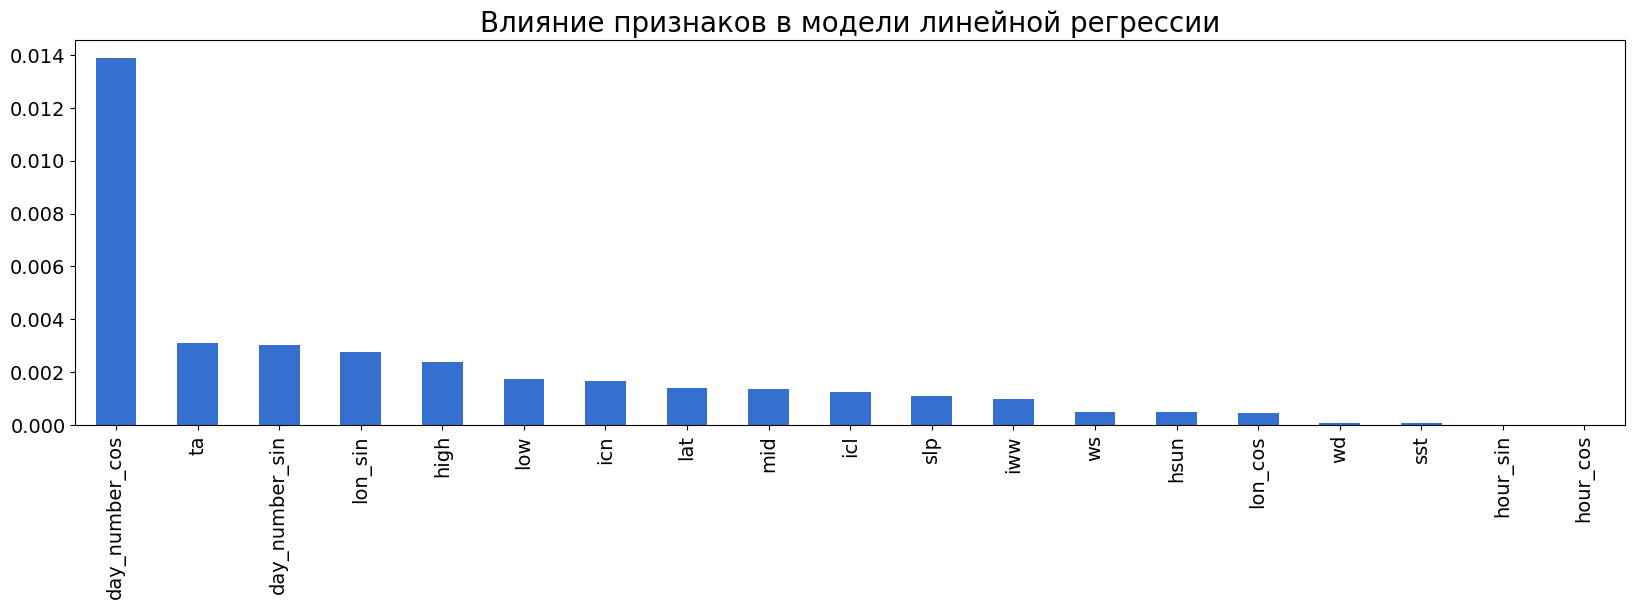

In [ ]:
importance = pd.Series(
    data = np.abs(model.coef_),
    index = x_train.columns)

importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(20,5), fontsize=14, color="#3670CF")
plt.title("Влияние признаков в модели линейной регрессии", fontsize=20)
plt.savefig('reluts_linreg.png', dpi=300)

In [ ]:
feature_importance = model_cat.get_feature_importance()
feature_names = x_train.columns

# Display feature importance
for name, importance in zip(feature_names, feature_importance):
    print(f"Feature: {name}, Importance: {importance:.2f}")

Feature: lat, Importance: 2.89
Feature: hsun, Importance: 6.88
Feature: slp, Importance: 4.04
Feature: ta, Importance: 6.36
Feature: sst, Importance: 2.39
Feature: icn, Importance: 26.90
Feature: icl, Importance: 1.96
Feature: low, Importance: 11.15
Feature: mid, Importance: 0.51
Feature: high, Importance: 0.00
Feature: iww, Importance: 11.84
Feature: ws, Importance: 1.24
Feature: wd, Importance: 17.05
Feature: lon_sin, Importance: 0.39
Feature: lon_cos, Importance: 0.34
Feature: day_number_sin, Importance: 1.31
Feature: day_number_cos, Importance: 4.74
Feature: hour_sin, Importance: 0.00
Feature: hour_cos, Importance: 0.00


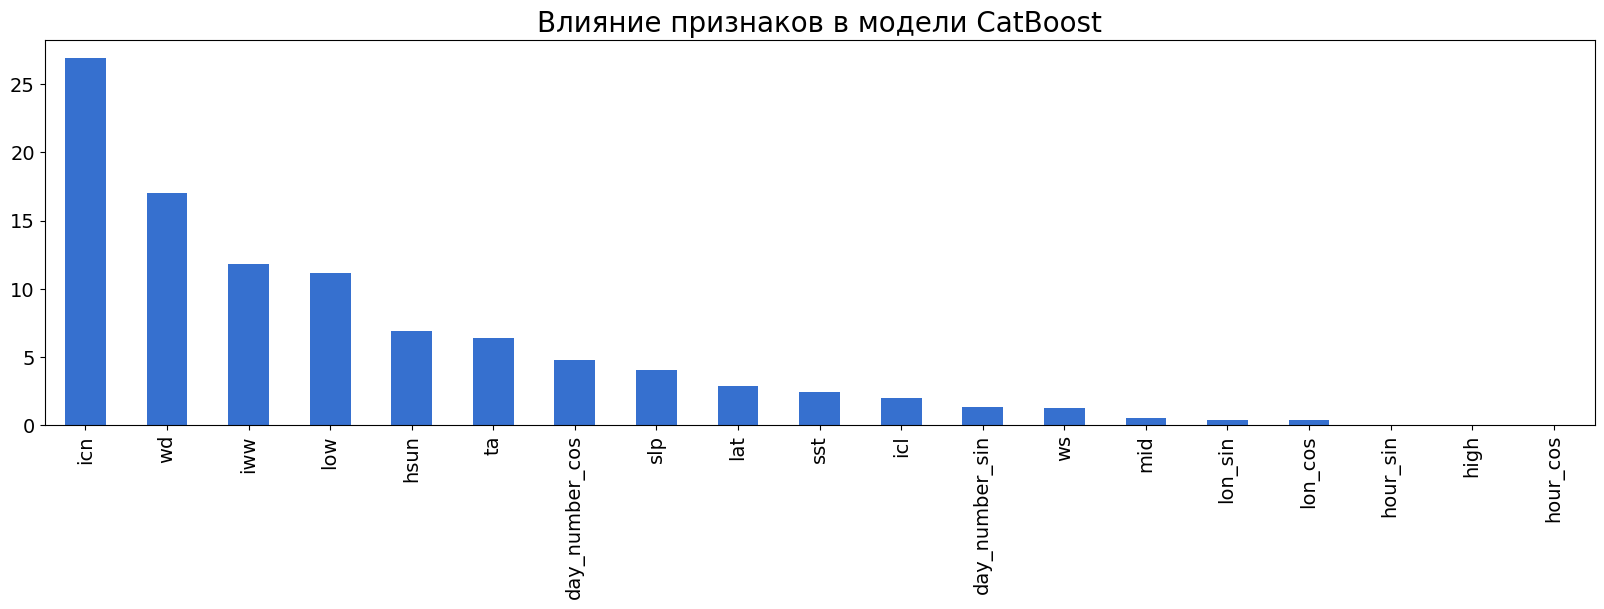

In [ ]:
importance = pd.Series(
    data = feature_importance,
    index = feature_names)

importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(20,5), fontsize=14, color="#3670CF")
plt.title("Влияние признаков в модели CatBoost", fontsize=20)
plt.show()